In [ ]:
# Execute no terminal "pip install -r requirements.txt"

In [22]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [ ]:
# Definindo a URL da API
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo"
r = requests.get(url)
dados = r.json()

In [24]:
# Extraindo e processando os dados da série temporal de fechamento
serie_temporal = dados.get("Time Series (Daily)", {})
df = pd.DataFrame.from_dict(serie_temporal, orient="index")
df = df.rename(columns={"4. close": "fechamento"})
df["fechamento"] = pd.to_numeric(df["fechamento"], errors="coerce")
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [25]:
# Calculando o retorno diário e acumulado
df["retorno_diario"] = df["fechamento"].pct_change()
df["retorno_acumulado"] = df["retorno_diario"].cumsum()

In [26]:
# Calculando a volatilidade
tamanho_janela = 10
df["volatilidade"] = df["retorno_diario"].rolling(window=tamanho_janela).std()

In [27]:
# Convertendo os resultados para JSON
retorno_acumulado_json = df[["retorno_acumulado"]].dropna().to_dict(orient="index")
volatilidade_json = df[["volatilidade"]].dropna().to_dict(orient="index")

In [28]:
# Convertendo as chaves de tempo para JSON
retorno_acumulado_json = {str(k): v for k, v in retorno_acumulado_json.items()}
volatilidade_json = {str(k): v for k, v in volatilidade_json.items()}

In [29]:
# Salvando os dados em JSON
with open("retorno_acumulado.json", "w") as arquivo_rc:
    json.dump(retorno_acumulado_json, arquivo_rc, indent=4)

with open("volatilidade.json", "w") as arquivo_v:
    json.dump(volatilidade_json, arquivo_v, indent=4)

In [30]:
# Exibindo as primeiras linhas do DataFrame.
print(df.head())
print("Resultados salvos nos arquivos 'retorno_acumulado.json' e 'volatilidade.json'")

             1. open   2. high    3. low  fechamento 5. volume  \
2024-08-26  196.0000  198.3450  195.9000      197.98   2567217   
2024-08-27  197.4400  199.4000  196.9700      198.73   2617229   
2024-08-28  199.0000  200.0000  197.4900      198.46   2645244   
2024-08-29  199.3000  201.1200  198.2700      198.90   2989594   
2024-08-30  199.1100  202.1700  198.7300      202.13   4750999   

            retorno_diario  retorno_acumulado  volatilidade  
2024-08-26             NaN                NaN           NaN  
2024-08-27        0.003788           0.003788           NaN  
2024-08-28       -0.001359           0.002430           NaN  
2024-08-29        0.002217           0.004647           NaN  
2024-08-30        0.016239           0.020886           NaN  
Resultados salvos nos arquivos 'retorno_acumulado.json' e 'volatilidade.json'


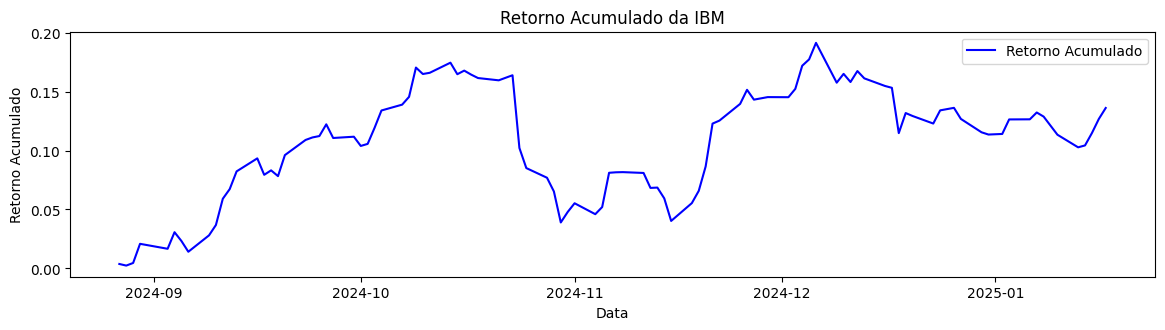

In [31]:
# Gráfico de Retorno Acumulado
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df["retorno_acumulado"], label="Retorno Acumulado", color="blue")
plt.title("Retorno Acumulado da IBM")
plt.xlabel("Data")
plt.ylabel("Retorno Acumulado")
plt.legend()

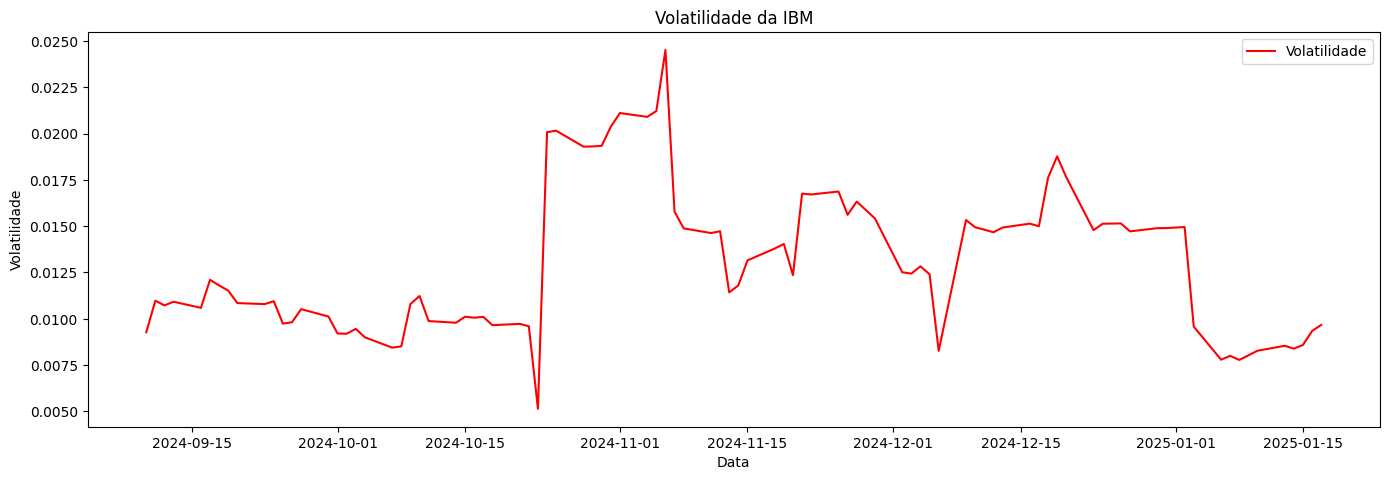

In [32]:
# Gráfico de Volatilidade
plt.figure(figsize=(14, 9))
plt.subplot(2, 1, 2)
plt.plot(df.index, df["volatilidade"], label="Volatilidade", color="red")
plt.title("Volatilidade da IBM")
plt.xlabel("Data")
plt.ylabel("Volatilidade")
plt.legend()
plt.tight_layout()  # Ajusta o layout para que os gráficos não se sobreponham
plt.show()  # Exibe o gráfico